<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Gamma-Gamma-Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
k = 4

Generate $\eta_j$ and $\delta_j$, where $j=1,2,3,4$.

In [15]:
eta_list = np.random.uniform(0,1/2,k)
delta_list = np.random.uniform(0,1/3,k)
eta_list, delta_list

(array([0.05510811, 0.49744516, 0.06214786, 0.2013781 ]),
 array([0.20104156, 0.17208443, 0.32039434, 0.31479451]))

For $X\sim Gamma(\eta_j, \delta_j)$, we have
\begin{eqnarray*}
f(x)=\frac{\delta_j^{\eta_j}}{\Gamma(\eta_j)}x^{\eta_j-1}e^{-\delta_j x}
\end{eqnarray*}

In [18]:
def ET_m(m, eta_list, delta_list, alpha, beta, theta, tau):
    def Generate_Z(m, eta_list, delta_list):
        sum_of_x_list = []
        for i in range(len(eta_list)):
            sum_of_x_list.append(np.sum(np.random.gamma(eta_list[i], 1/delta_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, eta_list, delta_list, alpha, beta, theta, tau):
        sum_of_time = 0
        sum_of_w = 0
        y = np.random.gamma(alpha, 1/beta)
        w = np.random.gamma(theta, 1/tau)
        Z_m = Generate_Z(m, eta_list, delta_list)
        while Z_m > y:
            sum_of_time = sum_of_time + y + w
            sum_of_w += w
            Z_m = Generate_Z(m, eta_list, delta_list)
            y = np.random.gamma(alpha, 1/beta)
            w = np.random.gamma(theta, 1/tau)
        return sum_of_time + Z_m, sum_of_w

    ET = np.repeat(np.nan, m)
    sum_w = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        W_0 = 0
        iter = 30000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[0]
            W_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[1]
        ET[i] = T_0/iter
        sum_w[i] = W_0/iter
        print(ET[i])
    return ET, sum_w

0.042496084090702047
0.1719972658217611
0.3529968893508548
0.5753356301729843
0.8008883272982472
1.1041003175260764
1.402491998688472
1.7559438771484546
2.1038252128212034
2.5471651642616147
2.910620235894717
3.427896570504615
3.9671411493440862
4.535910615388137
5.156974026262117
5.775081308388923
6.533146695896012
7.350150631992894
8.113688133630315
9.140484054455731
10.121863392801222
11.12375728406268
12.289254905640945
13.395664010790398
14.692799425799116
16.032438442830625
17.713967737729423
19.423722193580847
21.05881844492856
23.202574799984
24.9736412989009
27.245389029226487
29.777317586359207
32.30117017041779
34.64588594779782
37.676554574921624
40.78132048778282
44.34219405893186
47.52069688026312
51.46231508814646


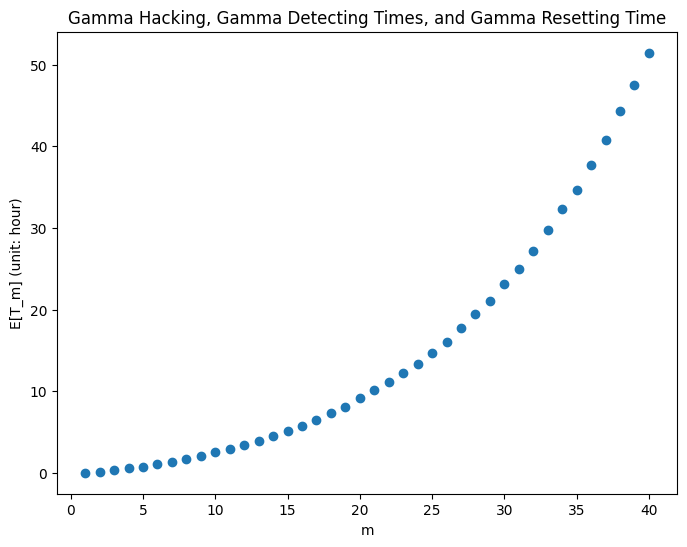

In [19]:
m = 40
alpha = 1/3
beta = 1/2
theta = 1/4
tau = 1/5
ET_m, sum_w = ET_m(m, eta_list, delta_list, alpha, beta, theta, tau)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'm')
plt.ylabel(r'E[T_m] (unit: hour)')
plt.title('Gamma Hacking, Gamma Detecting Times, and Gamma Resetting Time')
plt.show()

In [28]:
R = [.6*c for c in range(1, m+1)]
C_2 = [.5*c for c in range(1, m+1)]
C_1 = [.2*c**.5  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = ((ET_m[j]-sum_w[j])*(R[j] - C_2[j]) - C_1[j]*sum_w[j])/ET_m[j]
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))
E_mNR

38 0.468890302154669


array([-0.20308055, -0.2146325 , -0.22952026, -0.22041926, -0.26491994,
       -0.26036381, -0.26220582, -0.24604253, -0.23689946, -0.21342284,
       -0.24866843, -0.21191314, -0.17945587, -0.183453  , -0.14537889,
       -0.12756891, -0.08713403, -0.06919318, -0.04010473,  0.00560696,
        0.01409255,  0.03515203,  0.05423492,  0.07111161,  0.11277828,
        0.12158679,  0.13302484,  0.22203069,  0.21048315,  0.2355231 ,
        0.25199752,  0.26918615,  0.34463273,  0.32722358,  0.36255811,
        0.40848288,  0.43086483,  0.4688903 ,  0.4386599 ,  0.45360012])

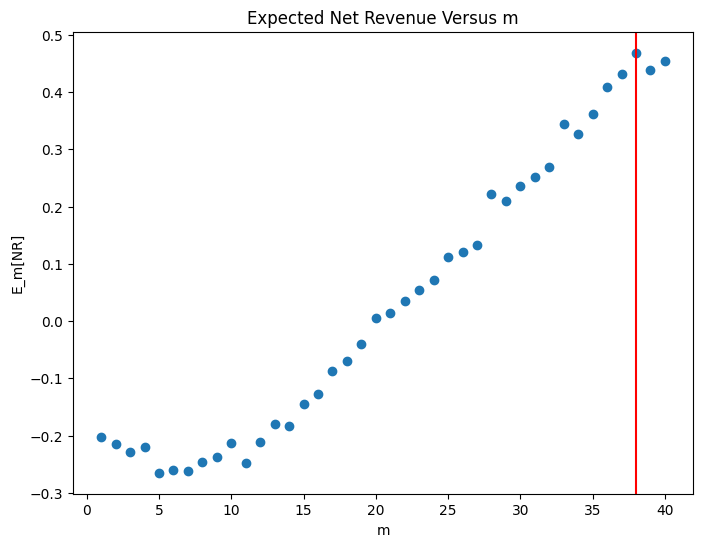

In [29]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'm')
plt.ylabel(r'E_m[NR]')
plt.title(r'Expected Net Revenue Versus m')
plt.show()